In [43]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv('emails.csv')
df = df.drop(columns=['Email No.'])
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [18]:
## split the data into independent and dependent variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [21]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 32)


In [23]:
## initialise the nerual network
model = Sequential()

##setup input layer
model.add(Dense(units=16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3000))

#hidden layer 1
model.add(Dense(units=8, kernel_initializer = 'uniform', activation = 'relu'))

#hidden layer 2
model.add(Dense(units=4, kernel_initializer = 'uniform', activation = 'relu'))

##reqularization
model.add(Dropout(0.25))

#output layer 
model.add(Dense(units=1, kernel_initializer = 'uniform', activation = 'sigmoid'))

#compiling the network
## adam, stochastic gradient descent= SGD, RMSPROP = rootm ean square propagation
#binary classification - binary_crossentropy, multi class classification -- catergorical_class_entropy
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
##train network 
history = model.fit(X_train, y_train, batch_size=120, epochs=20, validation_split=0.20)

Epoch 1/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0875 - accuracy: 0.9937 - val_loss: 0.1048 - val_accuracy: 0.9843
Epoch 2/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0884 - accuracy: 0.9943 - val_loss: 0.1078 - val_accuracy: 0.9843
Epoch 3/20
28/28 [==============================] - 0s 11ms/step - loss: 0.0837 - accuracy: 0.9949 - val_loss: 0.1080 - val_accuracy: 0.9831
Epoch 4/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0813 - accuracy: 0.9940 - val_loss: 0.1110 - val_accuracy: 0.9843
Epoch 5/20
28/28 [==============================] - 0s 11ms/step - loss: 0.0808 - accuracy: 0.9949 - val_loss: 0.1111 - val_accuracy: 0.9831
Epoch 6/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0782 - accuracy: 0.9943 - val_loss: 0.1140 - val_accuracy: 0.9831
Epoch 7/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0819 - accuracy: 0.9940 - val_loss: 0.1174 - val_accuracy: 0.9831
Epoch 8/20
28/

In [30]:
##save the network
model.save('ann_model.h5')

C:\Users\T\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
#load model
ann_model = tf.keras.models.load_model('ann_model.h5')

In [34]:
## make prediction
y_pred_ann = ann_model.predict(X_test)

33/33 [==============================] - 1s 7ms/step


In [35]:
y_pred_ann

array([[9.1448920e-03],
       [8.3504015e-17],
       [8.0705946e-03],
       ...,
       [9.9999952e-01],
       [5.5952967e-07],
       [1.0000000e+00]], dtype=float32)

In [36]:
## set threshold
y_pred_ann = np.where(y_pred_ann >0.5, 1, 0)
y_pred_ann

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [37]:
print(y_test.shape)
print(y_pred_ann.shape)

(1035,)
(1035, 1)


In [39]:
#flatten the y_pred_ann
y_pred_ann=y_pred_ann.flatten()

In [55]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_ann})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [56]:
##classification report
print(classification_report(y_test,y_pred_ann))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       716
           1       0.97      0.97      0.97       319

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('emails.csv')
df = df.drop(columns=['Email No.'])
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
## split the data into independent and dependent variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [ ]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 32)


In [ ]:
## initialise the nerual network
model = Sequential()

##setup input layer
model.add(Dense(units=16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3000))

#hidden layer 1
model.add(Dense(units=8, kernel_initializer = 'uniform', activation = 'relu'))

#hidden layer 2
model.add(Dense(units=4, kernel_initializer = 'uniform', activation = 'relu'))

##reqularization
model.add(Dropout(0.25))

#output layer 
model.add(Dense(units=1, kernel_initializer = 'uniform', activation = 'sigmoid'))

#compiling the network
## adam, stochastic gradient descent= SGD, RMSPROP = rootm ean square propagation
#binary classification - binary_crossentropy, multi class classification -- catergorical_class_entropy
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
##train network 
history = model.fit(X_train, y_train, batch_size=120, epochs=20, validation_split=0.20)

Epoch 1/20
28/28 [==============================] - 0s 15ms/step - loss: 0.0875 - accuracy: 0.9937 - val_loss: 0.1048 - val_accuracy: 0.9843
Epoch 2/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0884 - accuracy: 0.9943 - val_loss: 0.1078 - val_accuracy: 0.9843
Epoch 3/20
28/28 [==============================] - 0s 11ms/step - loss: 0.0837 - accuracy: 0.9949 - val_loss: 0.1080 - val_accuracy: 0.9831
Epoch 4/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0813 - accuracy: 0.9940 - val_loss: 0.1110 - val_accuracy: 0.9843
Epoch 5/20
28/28 [==============================] - 0s 11ms/step - loss: 0.0808 - accuracy: 0.9949 - val_loss: 0.1111 - val_accuracy: 0.9831
Epoch 6/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0782 - accuracy: 0.9943 - val_loss: 0.1140 - val_accuracy: 0.9831
Epoch 7/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0819 - accuracy: 0.9940 - val_loss: 0.1174 - val_accuracy: 0.9831
Epoch 8/20
28/

In [42]:
##confusion matrix
cm=confusion_matrix(y_test,y_pred_ann)

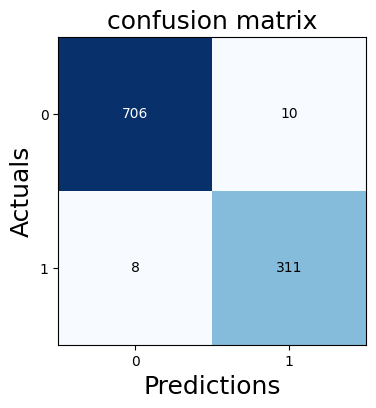

In [49]:
## confusion matrix plot
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('confusion matrix', fontsize = 18)
plt.show()


AUC: 0.980478


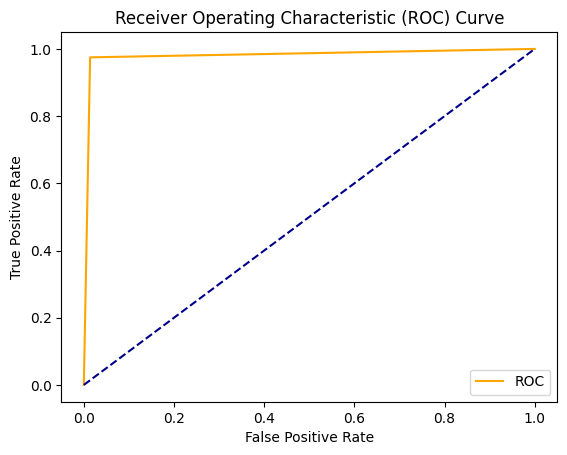

In [46]:
auc_mod2 = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %auc_mod2)

fpr, tpr, _ = roc_curve(y_test, y_pred_ann)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

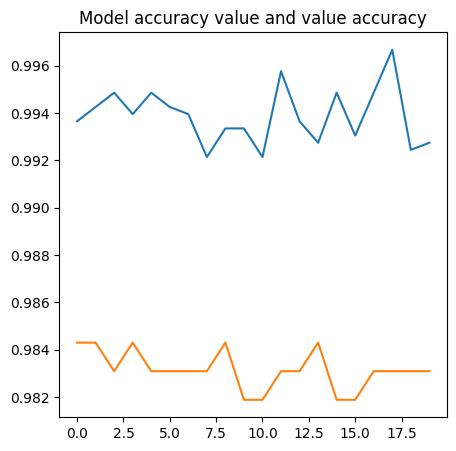

In [53]:
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Value_accuracy')
plt.title('Model accuracy value and value accuracy')
plt.show()

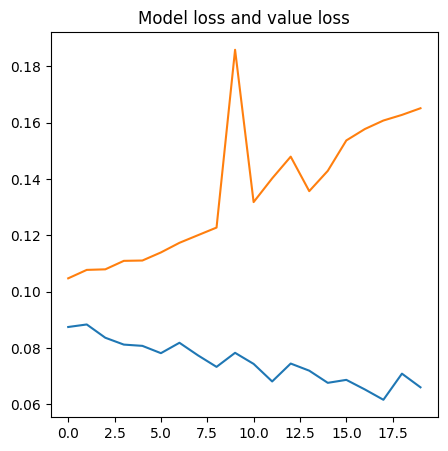

In [54]:
plt.figure(figsize=(5,5))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label = 'Value_loss')
plt.title('Model loss and value loss')
plt.show()